# Pandas

## Series

In [43]:
import pandas as pd
import numpy as np
import string
t = pd.Series(np.arange(10), index=list(string.ascii_uppercase[:10]))
print(t,type(t))
print(t.index,"\n", t.values)

A    0
B    1
C    2
D    3
E    4
F    5
G    6
H    7
I    8
J    9
dtype: int64 <class 'pandas.core.series.Series'>
Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype='object') 
 [0 1 2 3 4 5 6 7 8 9]


## read_csv

## 狗名字统计排序

In [33]:
import pandas as pd
dog_file = pd.read_csv("./dogNames2.csv")
dog_file = dog_file.sort_values(by = "Count_AnimalName", ascending=False)
print(dog_file.head(5), type(dog_file))
print("使用bool索引取出800<Count_AnimalName<1000的行")
print(dog_file[(800<dog_file["Count_AnimalName"])&(dog_file["Count_AnimalName"]<1000)])
print("使用bool索引取出Row_Labels.str.len()>4&Count_AnimalName>700")
print(dog_file[(dog_file["Row_Labels"].str.len()>4)&(dog_file["Count_AnimalName"]>700)])

      Row_Labels  Count_AnimalName
1156       BELLA              1195
9140         MAX              1153
2660     CHARLIE               856
3251        COCO               852
12368      ROCKY               823 <class 'pandas.core.frame.DataFrame'>
使用bool索引取出800<Count_AnimalName<1000的行
      Row_Labels  Count_AnimalName
2660     CHARLIE               856
3251        COCO               852
12368      ROCKY               823
使用bool索引取出Row_Labels.str.len()>4&Count_AnimalName>700
      Row_Labels  Count_AnimalName
1156       BELLA              1195
2660     CHARLIE               856
12368      ROCKY               823
8552       LUCKY               723


## DataFrame

In [3]:
import pandas as pd
import numpy as np
pd.DataFrame(np.arange(12).reshape(3,4))

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


## 结合Mongodb对DataFrame进行操作

In [37]:
from pymongo import MongoClient
import pandas as pd
#
client = MongoClient()
collection = client["douban2"]["tv1"]
data = list(collection.find())
data_list = []
for i in data:
    temp = {}
    temp["info"] = i["info"]
    temp["rating_count"] = i["rating"]["count"]
    temp["rating_value"] = i["rating"]["value"]
    temp["title"] = i["title"]
    temp["country"] = i["tv_category"]
    temp["directors"] = i["directors"]
    temp["actors"] = i["actors"]
    data_list.append(temp)
df = pd.DataFrame(data_list)
print(df.head(2)) # 取出头两行
print("df.info() = , df.describe() = ")
print(df.info(), df.describe()) # 打印概要信息
print(df["info"].str.split("/").tolist())

           actors  country directors                                     info  \
0  [潘粤明, 王泷正, 梁缘]  chinese      [王伟]  王伟/潘粤明/王泷正/梁缘/剧情/犯罪/悬疑/2017-08-30(中国大陆)   
1   [孙俪, 陈晓, 何润东]  chinese      [丁黑]      丁黑/孙俪/陈晓/何润东/剧情/古装/2017-08-30(中国大陆)   

   rating_count  rating_value    title  
0         23043           9.0     白夜追凶  
1         20867           8.5  那年花开月正圆  
df.info() = , df.describe() = 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2379 entries, 0 to 2378
Data columns (total 7 columns):
actors          2379 non-null object
country         2379 non-null object
directors       2379 non-null object
info            2379 non-null object
rating_count    2379 non-null int64
rating_value    2379 non-null float64
title           2379 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 130.2+ KB
None         rating_count  rating_value
count    2379.000000   2379.000000
mean     9079.419084      7.722783
std     16613.297194      1.068567
min       211.000000      2.

## 电影数直方图

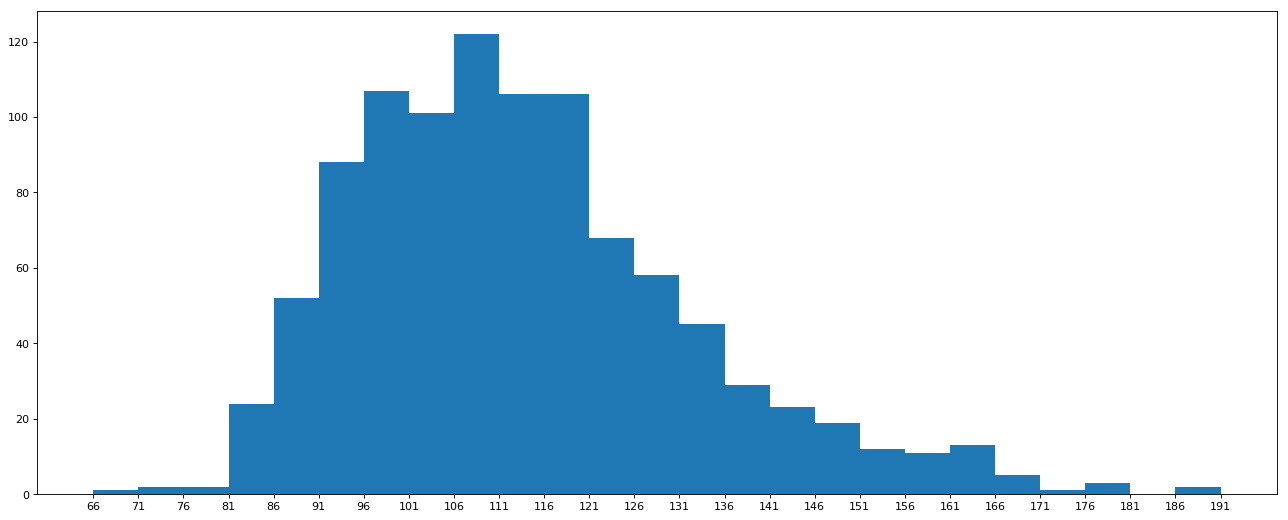

In [32]:
# 描述runtime分布情况
import pandas as pd
from matplotlib import pyplot as plt
file_path = "./IMDB-Movie-Data.csv"
df = pd.read_csv(file_path)
# 数据概要
#print(df.head(1), df.info())
# 准备数据
runtime_data = df["Runtime (Minutes)"].values
max_runtime = runtime_data.max()
min_runtime = runtime_data.min()
# 计算组数
num_bin = (max_runtime - min_runtime)//5
# set figure size
plt.figure(figsize = (20,8), dpi=80)
plt.hist(runtime_data, num_bin)
# set x ticks
_x = list(range(min_runtime, max_runtime+5, 5))
plt.xticks(_x)
# display figure
plt.show()

## 字符串离散化

In [28]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
file_path = "./IMDB-Movie-Data.csv"
df = pd.read_csv(file_path)
# 数据概要
print(df.head(1), df.info())
# 准备数据
rating_data = df["Rating"].values
directors_data = df["Director"].values
actors_data = df["Actors"].str.split(",").tolist()
actors_list = [i for j in actors_data for i in j] #双循环遍历list in list
print(rating_data.mean()) #  rating mean
print(len(df["Director"].unique())) # numbers of directors
print(len(set(actors_list))) #numbers of actors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB
   Rank                    Title                    Genre  \
0     1  Guardians of the Galaxy  Action,Adventure,Sci-Fi   

                                         Description    Director  \
0  A group of intergalactic criminals are forced ...  James Gunn   

                                              Actors  Year

## 数据合并和分组聚合

0     Action,Adventure,Sci-Fi
1    Adventure,Mystery,Sci-Fi
2             Horror,Thriller
3     Animation,Comedy,Family
4    Action,Adventure,Fantasy
Name: Genre, dtype: object
Drama        513.0
Action       303.0
Comedy       279.0
Adventure    259.0
Thriller     195.0
Crime        150.0
Romance      141.0
Sci-Fi       120.0
Horror       119.0
Mystery      106.0
Fantasy      101.0
Biography     81.0
Family        51.0
Animation     49.0
History       29.0
Sport         18.0
Music         16.0
War           13.0
Western        7.0
Musical        5.0
dtype: float64


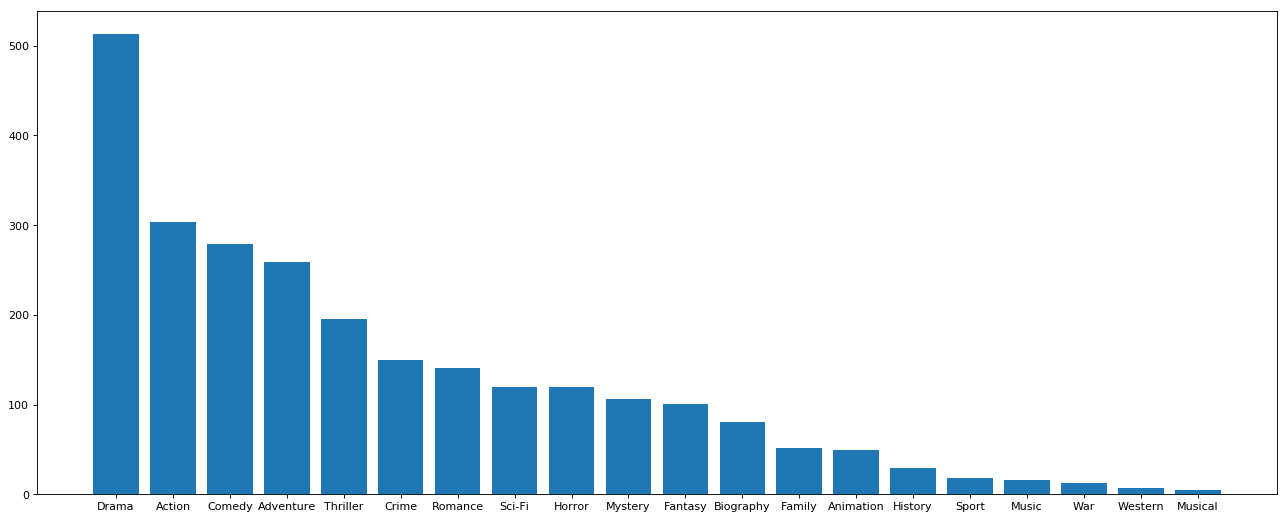

In [42]:
# 统计各个风格电影有多少部
# 构造全0数组，如果出现一个风格电影，则相应风格由0->1
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
file_path = "./IMDB-Movie-Data.csv"
df = pd.read_csv(file_path)
# abstract
print(df["Genre"].head(5))
# 统计分类列表
temp_genre_list = df["Genre"].str.split(",").tolist()
genre_list = list(set([i for j in temp_genre_list for i in j]))
# 构造全0数组
zeros_df = pd.DataFrame(np.zeros((df.shape[0], len(genre_list))),columns=genre_list)
# 统计每个分类出现位置set 1
for i in range(df.shape[0]):
    zeros_df.loc[i, temp_genre_list[i]] = 1
genre_count = zeros_df.sum(axis=0).sort_values(ascending=False)
print(genre_count)
# 画图
# set x,y axis
_x = genre_count.index
_y = genre_count.values
# set figure size
plt.figure(figsize=(20,8), dpi=80)
plt.bar(range(len(_x)), _y)
# set x ticks
plt.xticks(range(len(_x)),_x)
# display
plt.show()

## 数据分组聚合

In [56]:
# Starbucks统计
import pandas as pd
file_path = "./starbucks_store_worldwide.csv"
df = pd.read_csv(file_path)
# print(df.head(1), df.info())
Country_data = df.groupby(by="Country")
# 中美星巴克店面数量
country_count = Country_data["Brand"].count()
print("American starbucks =", country_count["US"])
print("Chinese starbucks =", country_count["CN"])
# 中国每个省份店面数量
china_data = df[df["Country"]=="CN"]
print(china_data.groupby(by="State/Province").count()["Brand"].sort_values(ascending=False).head(5))
# 数据按多个条件进行分组
df["Brand"].groupby(by=[df["Country"],df["State/Province"]]).count().head(3) # 普通取值，type=Series
df[["Brand"]].groupby(by=[df["Country"],df["State/Province"]]).count() # 多加一个方括号来取值，就可使type变成DataFrame


American starbucks = 13608
Chinese starbucks = 2734
State/Province
31    551
32    354
44    333
33    315
11    236
Name: Brand, dtype: int64


Brand
Country State/Province       
AD      7                   1
AE      AJ                  2
        AZ                 48
        DU                 82
        FU                  2
        RK                  3
        SH                  6
        UQ                  1
AR      B                  21
        C                  73
        M                   5
        S                   3
        X                   6
AT      3                   1
        5                   3
        9                  14
AU      NSW                 9
        QLD                 8
        VIC                 5
AW      AW                  3
AZ      BA                  3
        SAB                 1
BE      BE                  4
        VAN                 1
        VBR                 2
        VLG                10
        WAL                 2
BG      2                   1
        23                  4
BH      13                 16
...                       ...
US      MO                188
        MS                 32
        MT                 36
        NC                338
        ND                 13
        NE                 58
        NH                 29
        NJ                261
        NM                 76
        NV                253
        NY                645
        OH                378
        OK                 79
        OR                359
        PA                357
        RI                 27
        SC                131
        SD                 25
        TN                180
        TX               1042
        UT                101
        VA                432
        VT                  8
        WA                757
        WI                145
        WV                 25
        WY                 23
VN      HN                  6
        SG                 19
ZA      GT                  3

[545 rows x 1 columns]

## 索引方法和属性

In [ ]:
# Starbucks统计
import pandas as pd
file_path = "./starbucks_store_worldwide.csv"
df = pd.read_csv(file_path)
# print(df.head(1), df.info())
Country_data = df.groupby(by="Country")
# 中美星巴克店面数量
country_count = Country_data["Brand"].count()
# 中国每个省份店面数量
china_data = df[df["Country"]=="CN"]

## 星巴克统计

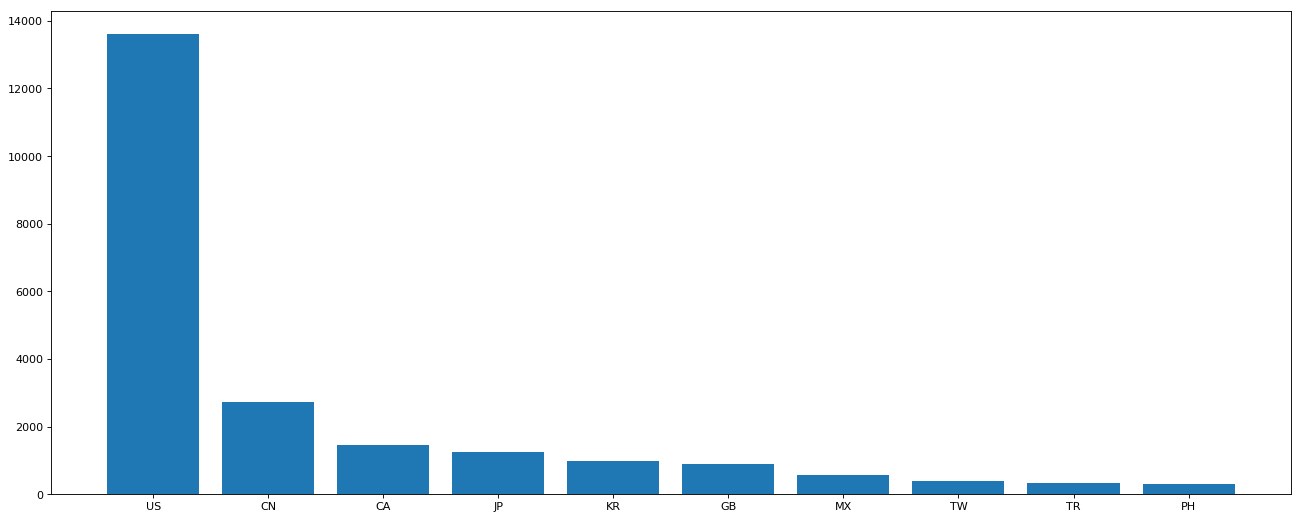

In [66]:
# 统计开店数量前10的国家
import pandas as pd
from matplotlib import pyplot as plt
file_path = "./starbucks_store_worldwide.csv"
df = pd.read_csv(file_path)
data1 = df.groupby(by="Country").count()["Brand"].sort_values(ascending=False).head(10)
# print(data1)
# 画图
# set x,y axis
_x = data1.index
_y = data1.values
# set figure size
plt.figure(figsize=(20,8), dpi=80)
plt.bar(range(len(_x)), _y)
# set x ticks
plt.xticks(range(len(_x)), _x)
# display figure
plt.show()

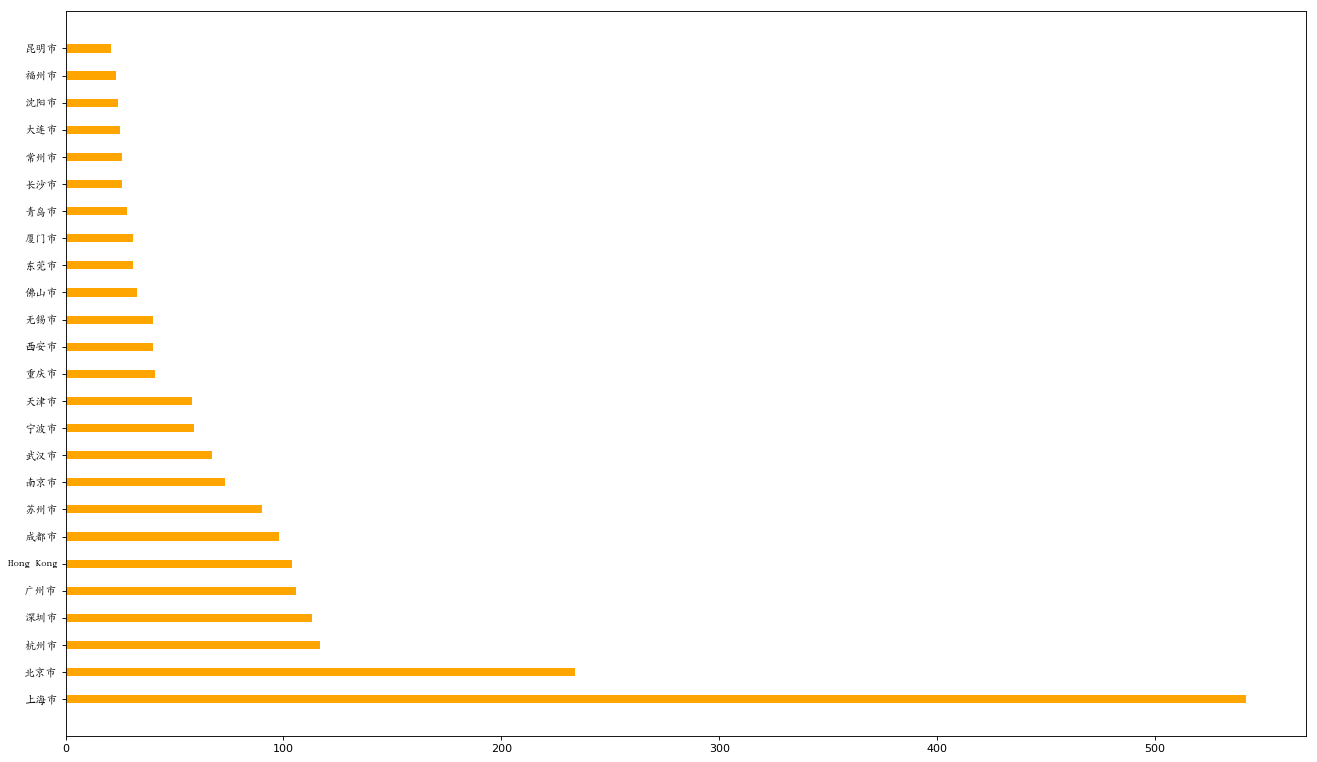

In [74]:
# 统计中国每座城市开店数量
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname="/usr/share/fonts/truetype/arphic/ukai.ttc")
file_path = "./starbucks_store_worldwide.csv"
# prepare data
df = pd.read_csv(file_path)
df = df[df["Country"]=="CN"]
data1 = df.groupby(by="City").count()["Brand"].sort_values(ascending=False).head(25)
# print(data1)
# 画图
# set x,y axis
_x = data1.index
_y = data1.values
# set figure size
plt.figure(figsize=(20,12), dpi=80)
plt.barh(range(len(_x)), _y,height=0.3, color="orange")
# set x ticks
# plt.xticks(range(len(_x)), _x,fontproperties=my_font)
# set y ticks
plt.yticks(range(len(_x)), _x,fontproperties=my_font)
# display figure
plt.show()

## 时间序列

In [3]:
# 911报警电话分类
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname="/usr/share/fonts/truetype/arphic/ukai.ttc")
file_path = "./911.csv"
# prepare data
df = pd.read_csv(file_path)
# print(df.head(5), df.info())
temp_list = df["title"].str.split(": ").tolist()
cate_list = [i[0] for i in temp_list]
# deliver value method 1
'''
cate_list = list(set([i[0] for i in temp_list]))
zeros_df = pd.DataFrame(np.zeros((df.shape[0], len(cate_list))), columns=cate_list) 
for cate in cate_list:
    zeros_df[cate][df["title"].str.contains(cate)] = 1
print(zeros_df)
''''''
# deliver value method 2
for i in range(df.shape[0]):
    zeros_df.loc[i, temp_list[i][0]] = 1
sum_ret = zeros_df.sum(axis=0)
print(sum_ret)
'''
# add a "cate" column and use groupby to count
df["cate"] = pd.DataFrame(np.array(cate_list).reshape((df.shape[0], 1))) # 在df多加一个cate列
print(df.head(5))
print(df.groupby(by="cate").count()["title"])

         lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e  cate  
0      REINDEER

timeStamp
2015-12-31     7916
2016-01-31    13096
2016-02-29    11396
2016-03-31    11059
2016-04-30    11287
Freq: M, Name: title, dtype: int64


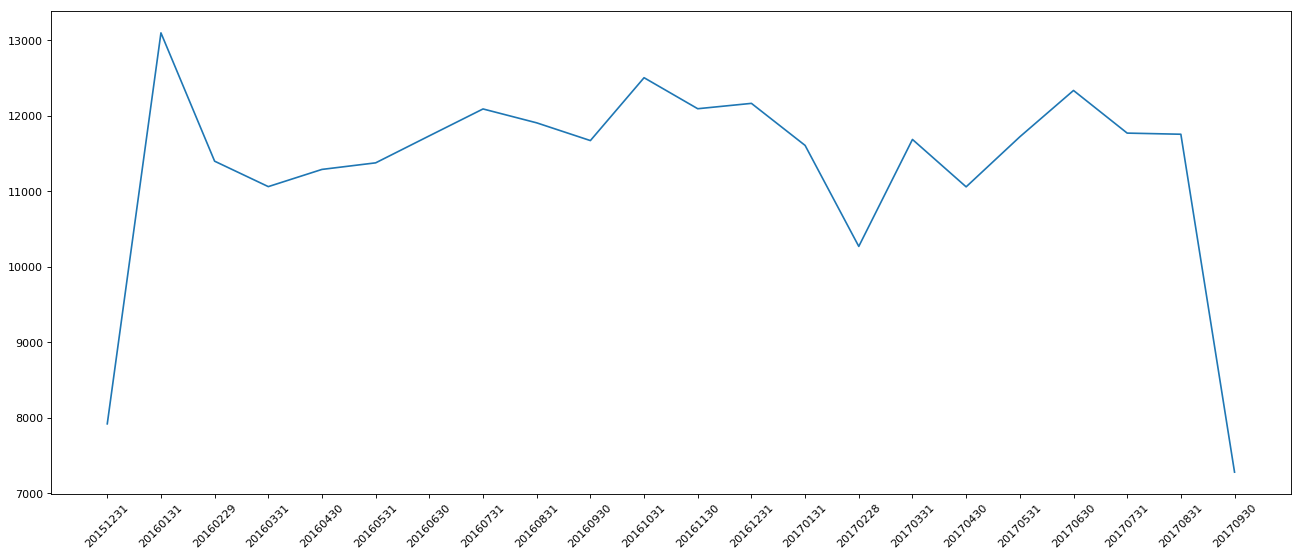

In [9]:
# 911电话次数月份变化
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname="/usr/share/fonts/truetype/arphic/ukai.ttc")
file_path = "./911.csv"
# prepare data
df = pd.read_csv(file_path)
df["timeStamp"] = pd.to_datetime(df["timeStamp"]) #时间戳
df.set_index("timeStamp", inplace=True)
count_by_month = df.resample("M").count()["title"]
print(count_by_month.head(5))
# draw figure
# set x,y axis
_x = count_by_month.index
_y = count_by_month.values
_x = [i.strftime("%Y%m%d") for i in _x]
# set figure size
plt.figure(figsize=(20,8), dpi=80)
plt.plot(range(len(_x)), _y)
# set x ticks
plt.xticks(range(len(_x)), _x, rotation=45)
# display
plt.show()

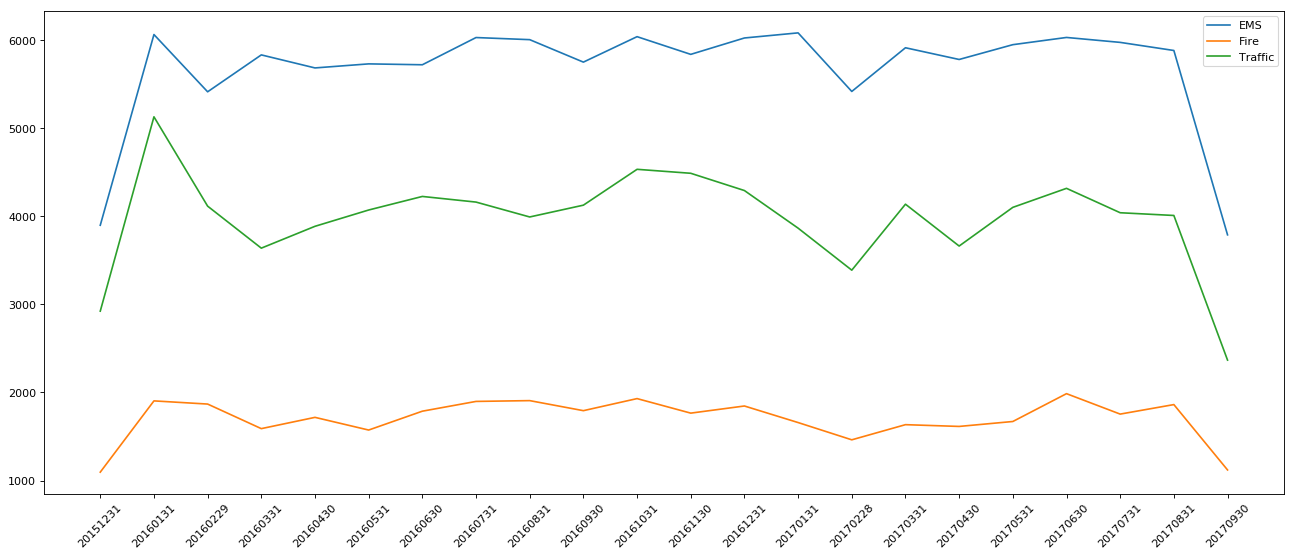

In [18]:
# 911电话不同月份不同类型变化
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname="/usr/share/fonts/truetype/arphic/ukai.ttc")
file_path = "./911.csv"
# draw method
# prepare data
df = pd.read_csv(file_path)
# set time index
df["timeStamp"] = pd.to_datetime(df["timeStamp"]) #时间戳
# add columns and category
# 分组
temp_list = df["title"].str.split(": ").tolist()
cate_list = [i[0] for i in temp_list]
df["cate"] = pd.DataFrame(np.array(cate_list).reshape((df.shape[0],1)))
df.set_index("timeStamp", inplace=True)
plt.figure(figsize=(20,8), dpi=80)
for group_name, group_data in df.groupby(by="cate"):
    # 对不同类型进行绘图
    count_by_month = group_data.resample("M").count()["title"]
    # draw figure
    # set x,y axis
    _x = count_by_month.index
    _y = count_by_month.values
    # set figure size
    _x = [i.strftime("%Y%m%d") for i in _x]
    plt.plot(range(len(_x)), _y, label=group_name)
# draw figure globally
plt.xticks(range(len(_x)), _x, rotation=45)
plt.legend(loc="best")
plt.show()

## pandas 案例

               No    year     month        day  hour  season  PM_Dongsi  \
datetime                                                                  
2010-01-01   84.5  2010.0  1.000000   4.000000  11.5     4.0        NaN   
2010-01-08  252.5  2010.0  1.000000  11.000000  11.5     4.0        NaN   
2010-01-15  420.5  2010.0  1.000000  18.000000  11.5     4.0        NaN   
2010-01-22  588.5  2010.0  1.000000  25.000000  11.5     4.0        NaN   
2010-01-29  756.5  2010.0  1.571429  14.285714  11.5     4.0        NaN   

            PM_Dongsihuan  PM_Nongzhanguan  PM_US Post       DEWP       HUMI  \
datetime                                                                       
2010-01-01            NaN              NaN   71.627586 -18.255952  54.395833   
2010-01-08            NaN              NaN   69.910714 -19.035714  49.386905   
2010-01-15            NaN              NaN  163.654762 -12.630952  57.755952   
2010-01-22            NaN              NaN   68.069307 -17.404762  34.0952

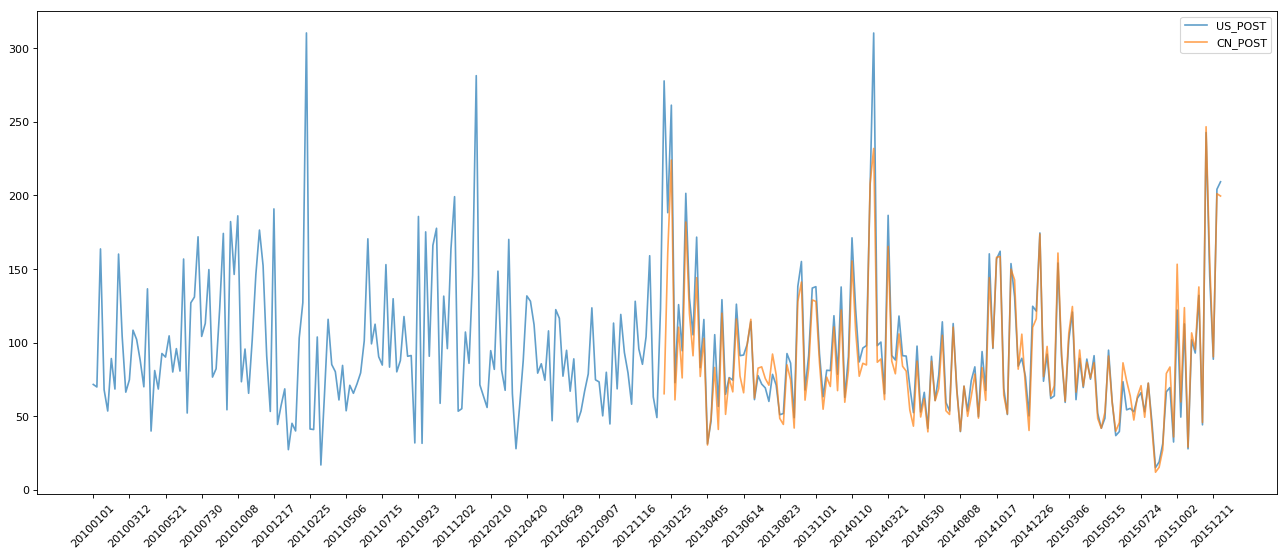

In [22]:
# PM2.5
# import
import pandas as pd
from matplotlib import  pyplot as plt
# file path
file_path = "./PM2.5/BeijingPM20100101_20151231.csv"
df = pd.read_csv(file_path)
#把分开的时间字符串通过periodIndex的方法转化为pandas的时间类型
period = pd.PeriodIndex(year=df["year"],month=df["month"],day=df["day"],hour=df["hour"],freq="H")
df["datetime"] = period
# print(df.head(10))
# 把datetime 设置为索引
df.set_index("datetime",inplace=True)
# 进行降采样
df = df.resample("7D").mean()
print(df.head())
# 处理缺失数据，删除缺失数据
# print(df["PM_US Post"])
# set data
data  =df["PM_US Post"]
data_china = df["PM_Nongzhanguan"]
print(data_china.head(5))
# draw figure
# set x,y aixs
_x = data.index
_x = [i.strftime("%Y%m%d") for i in _x]
_x_china = [i.strftime("%Y%m%d") for i in data_china.index]
print(len(_x_china),len(_x_china))
_y = data.values
_y_china = data_china.values
# set figure size
plt.figure(figsize=(20,8),dpi=80)
plt.plot(range(len(_x)),_y,label="US_POST",alpha=0.7)
plt.plot(range(len(_x_china)),_y_china,label="CN_POST",alpha=0.7)
# set x ticks
plt.xticks(range(0,len(_x_china),10),list(_x_china)[::10],rotation=45)
plt.legend(loc="best")
# display
plt.show()